# Predict NBA's Players Salary
## This file attemp to explore data, preprocess and test models before deciding the best for my personal project
### Data Source: https://www.basketball-reference.com/
### Author: Dinh Dang Khoa Tran

## DATA EXPLORE

In [2846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2847]:
contract_df = pd.read_csv('Data/nba_contract.csv', index_col = 'Rk')
stat_df = pd.read_csv('Data/player_stat.csv', index_col = 'Rk')

In [2848]:
contract_df.head()

,Player,Tm,2024-25,2025-26,2026-27,2027-28,2028-29,2029-30,Guaranteed,Player-additional
Rk,,,,,,,,,,
1,Stephen Curry,GSW,$55761216,$59606817,$62587158,NaN,NaN,NaN,$177955191,curryst01
2,Joel Embiid,PHI,$51415938,$55224526,$57985752,$62624612,$67263472,NaN,$227250828,embiijo01
3,Nikola Joki\uc0\u263,DEN,$51415938,$55224526,$59033114,$62841702,NaN,NaN,$165673578,jokicni01
4,Kevin Durant,PHO,$51179021,$54708609,NaN,NaN,NaN,NaN,$105887630,duranke01
5,Bradley Beal,PHO,$50203930,$53666270,$57128610,NaN,NaN,NaN,$103870200,bealbr01


In [2849]:
stat_df.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
1,Luka Dončić,24,DAL,PG,70,70,2624,804,1652,0.487,...,647,686,99,38,282,149,2370,21,MVP-3CPOY-6ASNBA1,doncilu01
2,Shai Gilgeous-Alexander,25,OKC,PG,75,75,2553,796,1487,0.535,...,415,465,150,67,162,184,2254,0,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
3,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,837,1369,0.611,...,841,476,87,79,250,210,2222,10,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
4,Jalen Brunson,27,NYK,PG,77,77,2726,790,1648,0.479,...,278,519,70,13,186,144,2212,0,MVP-5CPOY-5ASNBA2,brunsja01
5,Nikola Jokić,28,DEN,C,79,79,2737,822,1411,0.583,...,976,708,108,68,237,194,2085,25,MVP-1CPOY-4ASNBA1,jokicni01


### note: maybe some of their name got format error but the net_id is the same in 2 tables 

In [2850]:
contract_df.shape

(459, 10)

In [2851]:
stat_df.shape

(735, 32)

In [2852]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 1 to 459
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Player             459 non-null    object
 1   Tm                 459 non-null    object
 2   2024-25            459 non-null    object
 3   2025-26            344 non-null    object
 4   2026-27            228 non-null    object
 5   2027-28            120 non-null    object
 6   2028-29            36 non-null     object
 7   2029-30            7 non-null      object
 8   Guaranteed         438 non-null    object
 9   Player-additional  459 non-null    object
dtypes: object(10)
memory usage: 39.4+ KB


In [2853]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 1 to 572
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             735 non-null    object 
 1   Age                735 non-null    int64  
 2   Team               735 non-null    object 
 3   Pos                735 non-null    object 
 4   G                  735 non-null    int64  
 5   GS                 735 non-null    int64  
 6   MP                 735 non-null    int64  
 7   FG                 735 non-null    int64  
 8   FGA                735 non-null    int64  
 9   FG%                727 non-null    float64
 10  3P                 735 non-null    int64  
 11  3PA                735 non-null    int64  
 12  3P%                689 non-null    float64
 13  2P                 735 non-null    int64  
 14  2PA                735 non-null    int64  
 15  2P%                722 non-null    float64
 16  eFG%               727 non-null

### idea: clean each data first -> merge two data base on their same player's net_id

## DATA CLEANING

In [2854]:
#contract_df
# in this project, we use player stat to predict the salary they should receive 
#the player stat i get is 2023-2024 season, so will get 2024-2025 salary as the one to train

In [2855]:
contract_df = contract_df.drop(columns= ['2025-26', '2026-27', '2027-28', '2028-29', '2029-30', 'Guaranteed'])

In [2856]:
contract_df

,Player,Tm,2024-25,Player-additional
Rk,,,,
1,Stephen Curry,GSW,$55761216,curryst01
2,Joel Embiid,PHI,$51415938,embiijo01
3,Nikola Joki\uc0\u263,DEN,$51415938,jokicni01
4,Kevin Durant,PHO,$51179021,duranke01
5,Bradley Beal,PHO,$50203930,bealbr01
...,...,...,...,...
455,Mamadi Diakite,MEM,$464050,diakima01
456,Jaylen Nowell,NOP,$278782,nowelja01
457,Didi Louzada,POR,$268032,louzama01


In [2857]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 1 to 459
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Player             459 non-null    object
 1   Tm                 459 non-null    object
 2   2024-25            459 non-null    object
 3   Player-additional  459 non-null    object
dtypes: object(4)
memory usage: 17.9+ KB


In [2858]:
#its seem that there is no nan-values but player-additional, lets double check
contract_df.isna().any()

Player               False
Tm                   False
2024-25              False
Player-additional    False
dtype: bool

In [2859]:
#rename the col player-additional
contract_df = contract_df.rename(columns={'2024-25': '2024-25_Salary($)'})
contract_df['2024-25_Salary($)'] = contract_df['2024-25_Salary($)'].str.replace('$', '', regex=False).astype(float)

In [2860]:
#lets check duplicate value

In [2861]:
contract_df.duplicated().any()

False

In [2862]:
#stat_df

In [2863]:
stat_df.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
1,Luka Dončić,24,DAL,PG,70,70,2624,804,1652,0.487,...,647,686,99,38,282,149,2370,21,MVP-3CPOY-6ASNBA1,doncilu01
2,Shai Gilgeous-Alexander,25,OKC,PG,75,75,2553,796,1487,0.535,...,415,465,150,67,162,184,2254,0,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
3,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,837,1369,0.611,...,841,476,87,79,250,210,2222,10,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
4,Jalen Brunson,27,NYK,PG,77,77,2726,790,1648,0.479,...,278,519,70,13,186,144,2212,0,MVP-5CPOY-5ASNBA2,brunsja01
5,Nikola Jokić,28,DEN,C,79,79,2737,822,1411,0.583,...,976,708,108,68,237,194,2085,25,MVP-1CPOY-4ASNBA1,jokicni01


In [2864]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 1 to 572
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             735 non-null    object 
 1   Age                735 non-null    int64  
 2   Team               735 non-null    object 
 3   Pos                735 non-null    object 
 4   G                  735 non-null    int64  
 5   GS                 735 non-null    int64  
 6   MP                 735 non-null    int64  
 7   FG                 735 non-null    int64  
 8   FGA                735 non-null    int64  
 9   FG%                727 non-null    float64
 10  3P                 735 non-null    int64  
 11  3PA                735 non-null    int64  
 12  3P%                689 non-null    float64
 13  2P                 735 non-null    int64  
 14  2PA                735 non-null    int64  
 15  2P%                722 non-null    float64
 16  eFG%               727 non-null

In [2865]:
#there are missing data at FG% 3P% 2P% FT% Award
#notice: there are only 55 non-null values in Award

In [2866]:
stat_df.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl',
       'Awards', 'Player-additional'],
      dtype='object')

In [2867]:
#i think the value of a player will getting higher if hey got a champion, and some of them have personal award
#change award to cato values with the number of time they win the nba


In [2868]:
rows_without_nan_in_awards = stat_df[stat_df['Awards'].notna()]
print(rows_without_nan_in_awards['Awards'])

Rk
1             MVP-3CPOY-6ASNBA1
2       MVP-2DPOY-7CPOY-3ASNBA1
3      MVP-4DPOY-9CPOY-12ASNBA1
4             MVP-5CPOY-5ASNBA2
5             MVP-1CPOY-4ASNBA1
6             MVP-7CPOY-8ASNBA2
7                   MVP-9ASNBA2
8             MVP-6CPOY-9ASNBA1
9                       CPOY-12
10                 CPOY-1ASNBA3
11                       CPOY-2
12                 DPOY-4ASNBA2
13                       ASNBA3
14                CPOY-10ASNBA3
15                      MIP-1AS
16                           AS
17                    CPOY-11AS
20                           AS
21                       ASNBA2
22                           AS
26             MVP-8DPOY-10NBA3
28                  ROY-1DPOY-2
30                       CPOY-7
33                           AS
38                       ASNBA3
39                           AS
43                     DPOY-3AS
44                        ROY-2
47                      CPOY-12
48                           AS
49                           AS
50   

In [2869]:
#idea loop -> if nba in string -> set cell to the number behind 'nba'
stat_df['Awards'] = stat_df['Awards'].fillna(0)
awards_list = stat_df['Awards'].to_list()

In [2870]:
awards_list

['MVP-3CPOY-6ASNBA1',
 'MVP-2DPOY-7CPOY-3ASNBA1',
 'MVP-4DPOY-9CPOY-12ASNBA1',
 'MVP-5CPOY-5ASNBA2',
 'MVP-1CPOY-4ASNBA1',
 'MVP-7CPOY-8ASNBA2',
 'MVP-9ASNBA2',
 'MVP-6CPOY-9ASNBA1',
 'CPOY-12',
 'CPOY-1ASNBA3',
 'CPOY-2',
 'DPOY-4ASNBA2',
 'ASNBA3',
 'CPOY-10ASNBA3',
 'MIP-1AS',
 'AS',
 'CPOY-11AS',
 0,
 0,
 0,
 0,
 'AS',
 'ASNBA2',
 'AS',
 0,
 0,
 0,
 'MVP-8DPOY-10NBA3',
 0,
 'ROY-1DPOY-2',
 0,
 'CPOY-7',
 0,
 0,
 'AS',
 0,
 0,
 0,
 0,
 'ASNBA3',
 'AS',
 0,
 0,
 0,
 'DPOY-3AS',
 'ROY-2',
 0,
 0,
 'CPOY-12',
 'AS',
 'AS',
 '6MOY-5',
 0,
 0,
 0,
 0,
 0,
 0,
 'ROY-3',
 0,
 'DPOY-10',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'AS',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '6MOY-9',
 0,
 '6MOY-3',
 0,
 0,
 0,
 'CPOY-126MOY-2',
 'DPOY-8',
 0,
 'AS',
 '6MOY-1',
 0,
 0,
 'DPOY-1',
 '6MOY-4',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'DPOY-10',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'ROY-46MOY-9',
 0,
 0,
 0,
 0,
 0,
 0,
 '6MOY-9',
 0,
 0,
 0,
 0,
 

In [2871]:
for i in range(len(awards_list)):
    if "NBA" in str(awards_list[i]):
        awards_list[i] = int(awards_list[i][-1])
    else:
        awards_list[i] = 0


In [2872]:
awards_list

[1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 3,
 0,
 2,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [2873]:
stat_df['Awards'] = awards_list

In [2874]:
stat_df.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
1,Luka Dončić,24,DAL,PG,70,70,2624,804,1652,0.487,...,647,686,99,38,282,149,2370,21,1,doncilu01
2,Shai Gilgeous-Alexander,25,OKC,PG,75,75,2553,796,1487,0.535,...,415,465,150,67,162,184,2254,0,1,gilgesh01
3,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,837,1369,0.611,...,841,476,87,79,250,210,2222,10,1,antetgi01
4,Jalen Brunson,27,NYK,PG,77,77,2726,790,1648,0.479,...,278,519,70,13,186,144,2212,0,2,brunsja01
5,Nikola Jokić,28,DEN,C,79,79,2737,822,1411,0.583,...,976,708,108,68,237,194,2085,25,1,jokicni01


In [2875]:
#handle other nan-values


In [2876]:
rows_with_nan_in_ft = stat_df[stat_df['FT%'].isna()]
print(rows_with_nan_in_ft[['FT', 'FTA', 'FT%', 'ORB']])

     FT  FTA  FT%  ORB
Rk                    
259   0    0  NaN    0
281   0    0  NaN    0
357   0    0  NaN    1
359   0    0  NaN    0
370   0    0  NaN    1
391   0    0  NaN    5
405   0    0  NaN    8
410   0    0  NaN    0
417   0    0  NaN    0
442   0    0  NaN    0
447   0    0  NaN    1
450   0    0  NaN    0
457   0    0  NaN    0
459   0    0  NaN    3
459   0    0  NaN    0
459   0    0  NaN    0
459   0    0  NaN    3
471   0    0  NaN    0
479   0    0  NaN    2
499   0    0  NaN    2
502   0    0  NaN    3
506   0    0  NaN    3
506   0    0  NaN    2
506   0    0  NaN    1
508   0    0  NaN    1
509   0    0  NaN    1
513   0    0  NaN    0
518   0    0  NaN    2
523   0    0  NaN    1
527   0    0  NaN    0
529   0    0  NaN    6
532   0    0  NaN    4
534   0    0  NaN    0
536   0    0  NaN    1
538   0    0  NaN    1
539   0    0  NaN    0
541   0    0  NaN    4
542   0    0  NaN    1
543   0    0  NaN    4
547   0    0  NaN    1
548   0    0  NaN    0
549   0    

In [2877]:
# notice: the one that missing value in FT% is the one has no free through, -> fill them with 0
stat_df['FT%'] = stat_df['FT%'].fillna(0)

In [2878]:
stat_df['FT%']

Rk
1      0.786
2      0.874
3      0.657
4      0.847
5      0.817
       ...  
568    0.000
569    0.000
570    0.000
571    0.000
572    0.000
Name: FT%, Length: 735, dtype: float64

In [2879]:
stat_df.shape

(735, 32)

In [2880]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 1 to 572
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             735 non-null    object 
 1   Age                735 non-null    int64  
 2   Team               735 non-null    object 
 3   Pos                735 non-null    object 
 4   G                  735 non-null    int64  
 5   GS                 735 non-null    int64  
 6   MP                 735 non-null    int64  
 7   FG                 735 non-null    int64  
 8   FGA                735 non-null    int64  
 9   FG%                727 non-null    float64
 10  3P                 735 non-null    int64  
 11  3PA                735 non-null    int64  
 12  3P%                689 non-null    float64
 13  2P                 735 non-null    int64  
 14  2PA                735 non-null    int64  
 15  2P%                722 non-null    float64
 16  eFG%               727 non-null

In [2881]:
columns_with_nan = stat_df.columns[stat_df.isna().any()]
print(columns_with_nan)

Index(['FG%', '3P%', '2P%', 'eFG%'], dtype='object')


In [2882]:
#lets check the row with nan value
stat_df[stat_df['2P%'].isna()][['2P', '2PA', '2P%']]

,2P,2PA,2P%
Rk,,,
357,0,0,NaN
359,0,0,NaN
417,0,0,NaN
447,0,0,NaN
459,0,0,NaN
471,0,0,NaN
527,0,0,NaN
556,0,0,NaN
563,0,0,NaN


In [2883]:
#solution: fill all of them with 0
stat_df= stat_df.fillna(0)

In [2884]:
#another problem pops up, in one season, a player can change their team, so lets check if there are duplicate player
stat_df['Player'].duplicated().any()

True

In [2885]:
# Find duplicate rows based on the 'Player' column
duplicate_rows = stat_df[stat_df.duplicated(subset='Player', keep=False)]

# Print the duplicate rows
duplicate_rows


,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
19,Pascal Siakam,29,2TM,PF,80,80,2657,681,1271,0.536,...,565,342,63,25,141,193,1737,1,0,siakapa01
19,Pascal Siakam,29,TOR,PF,39,39,1354,325,623,0.522,...,246,190,32,10,83,87,865,0,0,siakapa01
19,Pascal Siakam,29,IND,PF,41,41,1303,356,648,0.549,...,319,152,31,15,58,106,872,1,0,siakapa01
64,Terry Rozier,29,2TM,SG,61,60,2040,442,998,0.443,...,247,342,63,21,106,101,1205,0,0,roziete01
64,Terry Rozier,29,CHO,SG,30,30,1065,252,549,0.459,...,117,198,32,12,65,52,696,0,0,roziete01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Mamadi Diakite,27,SAS,PF,3,0,16,4,5,0.800,...,3,2,0,1,0,1,12,0,0,diakima01
527,Mamadi Diakite,27,NYK,PF,3,0,8,0,1,0.000,...,1,0,1,0,1,1,0,0,0,diakima01
556,Filip Petrušev,23,2TM,C,3,0,10,1,2,0.500,...,1,0,0,0,0,1,3,0,0,petrufi01


In [2886]:
#notice: the first row of each player that change team will be something like 2TM or 3TM, which combine all the stat
#drop keep only the first one
stat_df = stat_df.drop_duplicates(subset='Player', keep='first')
stat_df

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
1,Luka Dončić,24,DAL,PG,70,70,2624,804,1652,0.487,...,647,686,99,38,282,149,2370,21,1,doncilu01
2,Shai Gilgeous-Alexander,25,OKC,PG,75,75,2553,796,1487,0.535,...,415,465,150,67,162,184,2254,0,1,gilgesh01
3,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,837,1369,0.611,...,841,476,87,79,250,210,2222,10,1,antetgi01
4,Jalen Brunson,27,NYK,PG,77,77,2726,790,1648,0.479,...,278,519,70,13,186,144,2212,0,2,brunsja01
5,Nikola Jokić,28,DEN,C,79,79,2737,822,1411,0.583,...,976,708,108,68,237,194,2085,25,1,jokicni01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Danny Green,36,PHI,SG,2,0,18,0,2,0.000,...,2,1,1,0,0,1,0,0,0,greenda02
569,Ron Harper Jr.,23,TOR,PF,1,0,4,0,0,0.000,...,0,1,0,0,0,2,0,0,0,harpero02
570,Justin Jackson,28,MIN,SF,2,0,1,0,0,0.000,...,0,0,0,0,0,0,0,0,0,jacksju01


## CONCAT 2 DATASET

In [2887]:
#idea: concat base on Rk or player_id
df = pd.merge(contract_df, stat_df, on='Player-additional', how='inner')

In [2888]:
df.columns

Index(['Player_x', 'Tm', '2024-25_Salary($)', 'Player-additional', 'Player_y',
       'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards'],
      dtype='object')

In [2889]:
# Drop the specified columns
df.drop(['Team', 'Player_y'], axis=1, inplace=True)


In [2890]:
df.columns

Index(['Player_x', 'Tm', '2024-25_Salary($)', 'Player-additional', 'Age',
       'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards'],
      dtype='object')

In [2891]:
df

,Player_x,Tm,2024-25_Salary($),Player-additional,Age,Pos,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards
0,Stephen Curry,GSW,55761216.0,curryst01,35,PG,74,74,2421,650,...,293,330,379,54,28,210,117,1956,0,3
1,Joel Embiid,PHI,51415938.0,embiijo01,29,C,39,39,1309,450,...,335,430,219,46,66,150,112,1353,2,0
2,Nikola Joki\uc0\u263,DEN,51415938.0,jokicni01,28,C,79,79,2737,822,...,753,976,708,108,68,237,194,2085,25,1
3,Kevin Durant,PHO,51179021.0,duranke01,35,PF,75,75,2791,751,...,454,495,378,69,91,244,133,2032,1,2
4,Bradley Beal,PHO,50203930.0,bealbr01,30,SG,53,53,1767,377,...,178,232,265,52,27,131,127,964,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Ryan Rollins,WAS,600000.0,rolliry01,21,PG,13,0,78,14,...,11,13,14,10,3,8,8,44,0,0
391,Mamadi Diakite,MEM,464050.0,diakima01,27,PF,6,0,24,4,...,3,4,2,1,1,1,2,12,0,0
392,Jaylen Nowell,NOP,278782.0,nowelja01,24,SG,13,1,214,34,...,18,24,19,4,2,7,15,81,0,0
393,AJ Griffin,HOU,250000.0,griffaj01,20,SF,20,0,171,18,...,16,18,5,1,2,8,6,48,0,0


In [2892]:
df.describe()

,2024-25_Salary($),Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards
count,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.246516e+07,25.931646,57.400000,30.172152,1388.794937,248.281013,520.594937,0.472534,75.164557,204.139241,...,191.037975,251.455696,156.273418,42.817722,29.696203,75.430380,106.660759,672.888608,0.349367,0.075949
std,1.300345e+07,4.460530,20.186491,28.172434,781.472683,187.518472,384.759616,0.082211,66.768414,172.484233,...,142.949535,188.565665,142.236134,27.741230,31.570787,58.479656,59.160338,515.368837,2.216566,0.414587
min,1.000000e+05,19.000000,2.000000,0.000000,10.000000,1.000000,3.000000,0.167000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.659262e+06,23.000000,46.000000,3.000000,724.000000,90.500000,206.000000,0.430000,15.000000,50.500000,...,84.000000,119.500000,53.500000,20.000000,8.000000,30.000000,62.000000,252.000000,0.000000,0.000000
50%,7.565217e+06,25.000000,62.000000,22.000000,1436.000000,215.000000,446.000000,0.460000,63.000000,180.000000,...,167.000000,218.000000,109.000000,42.000000,21.000000,64.000000,106.000000,561.000000,0.000000,0.000000
75%,1.713000e+07,29.000000,73.500000,57.000000,2028.000000,360.500000,768.000000,0.504500,117.000000,326.000000,...,250.000000,338.000000,230.500000,62.500000,41.000000,108.000000,148.500000,980.000000,0.000000,0.000000
max,5.576122e+07,39.000000,84.000000,82.000000,2989.000000,837.000000,1652.000000,0.747000,357.000000,876.000000,...,826.000000,1120.000000,752.000000,150.000000,254.000000,282.000000,254.000000,2370.000000,26.000000,3.000000


## VISUALIZATION

### distribuiton of player to salary

/var/folders/5n/r6b07v4s5cs3379jq_dtb8q00000gn/T/ipykernel_5214/912420318.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f"${int(x/1e6)}M" for x in plt.gca().get_xticks()])


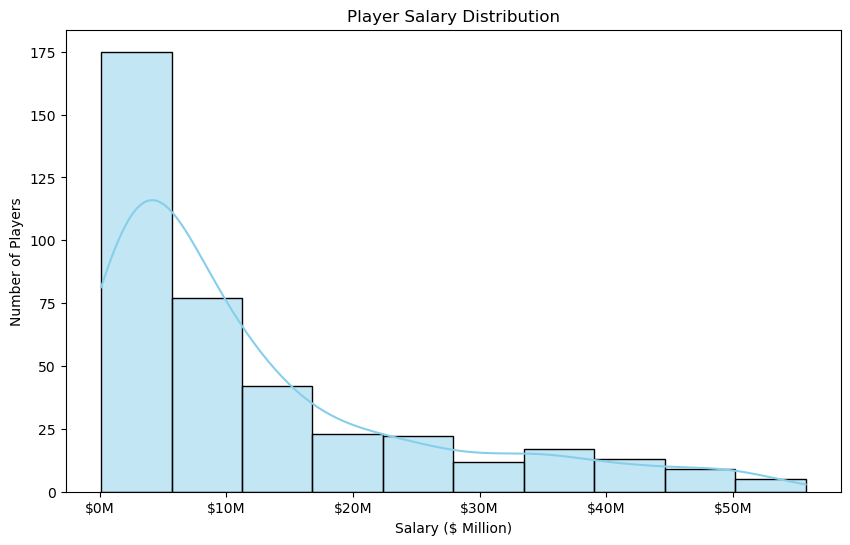

In [2893]:
plt.figure(figsize=(10, 6))
sns.histplot(df['2024-25_Salary($)'], bins=10, color= 'skyblue', kde=True)
plt.gca().set_xticklabels([f"${int(x/1e6)}M" for x in plt.gca().get_xticks()])

# Add title and labels
plt.title("Player Salary Distribution")
plt.xlabel("Salary ($ Million)")
plt.ylabel("Number of Players")
plt.show()

#### note: nearly half of nba players who got the salary between 0-10 Milion $

In [2894]:
df['2024-25_Salary($)'].describe()

count    3.950000e+02
mean     1.246516e+07
std      1.300345e+07
min      1.000000e+05
25%      2.659262e+06
50%      7.565217e+06
75%      1.713000e+07
max      5.576122e+07
Name: 2024-25_Salary($), dtype: float64

### Boxplot distribution of nba salary

/var/folders/5n/r6b07v4s5cs3379jq_dtb8q00000gn/T/ipykernel_5214/2251663808.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f"${int(x/1e6)}M" for x in plt.gca().get_xticks()])


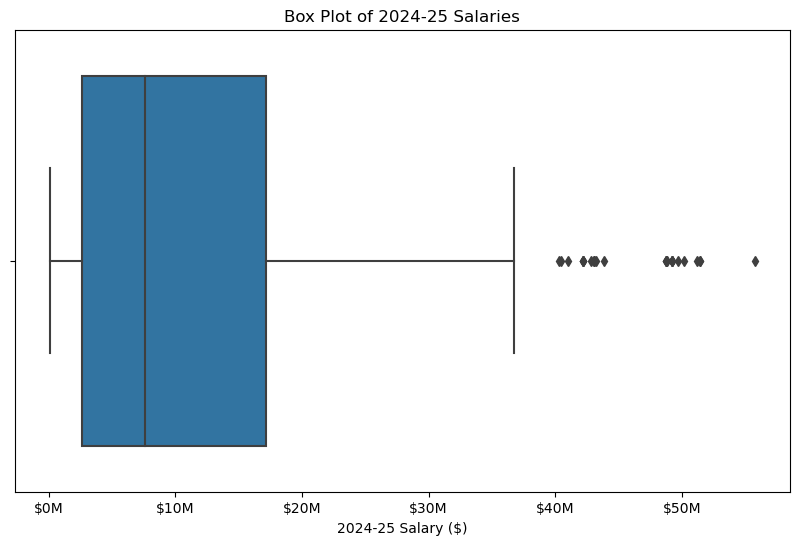

In [2895]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['2024-25_Salary($)'])
plt.xlabel('2024-25 Salary ($)')
plt.gca().set_xticklabels([f"${int(x/1e6)}M" for x in plt.gca().get_xticks()])
plt.title('Box Plot of 2024-25 Salaries')
plt.show()

### Summary:
##### Min Salary: $0 M, with some players earning less than a milion.
##### IQR (Blue Area): Middle 50% of players earn between Q1 and Q3 salaries (e.g., ~$5M to ~$15M).
##### Outliers: A small group of players earn extremely high salaries, e.g., $30M–$50M. These are the dots beyond the whiskers.

## FEATURES vs TARGET

#### POSITION vs SALARY

<Axes: xlabel='Pos', ylabel='2024-25_Salary($)'>

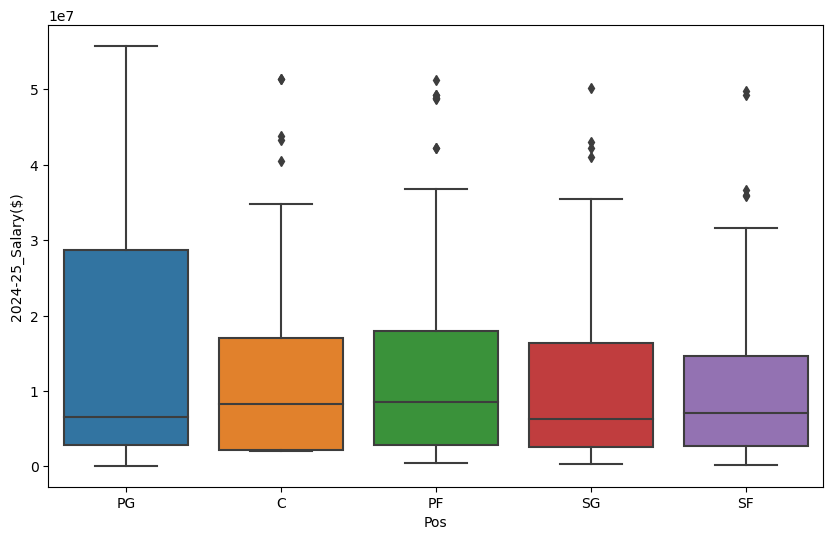

In [2896]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Pos", y="2024-25_Salary($)")


#### NOTE: The median values are the same for every pos, the difference is not large (C and PF abit larger)
####       PG has the biggest range of value while the rest significantly smaller
####       the min values are the same (except C)
####       PG has the highest pay player (as my knowledge: Stephen Curry)

Text(0.5, 1.0, 'Salary vs Age')

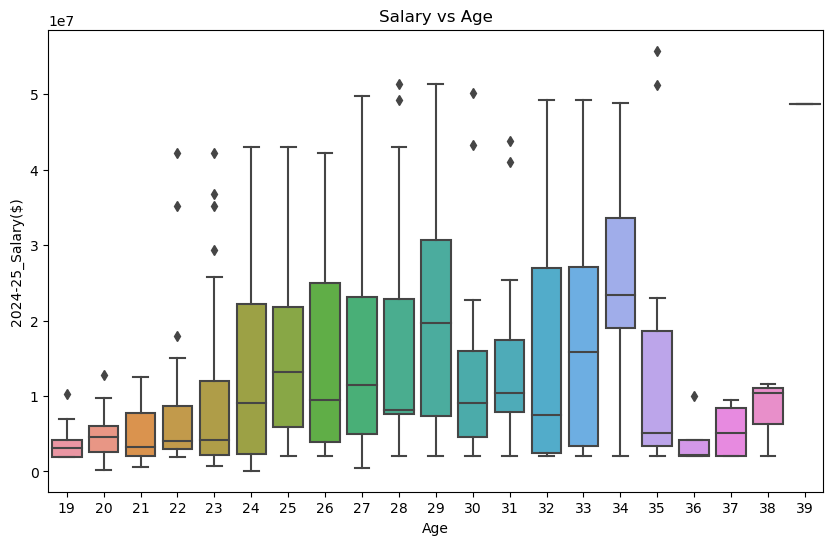

In [2897]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age", y="2024-25_Salary($)")
plt.title("Salary vs Age")

#### using box plot tend to hard to say anything, 
#### the most significant thing is that when players are too young or two old, the salary is significantly low
#### try regression plot

Text(0.5, 1.0, 'Salary vs Age')

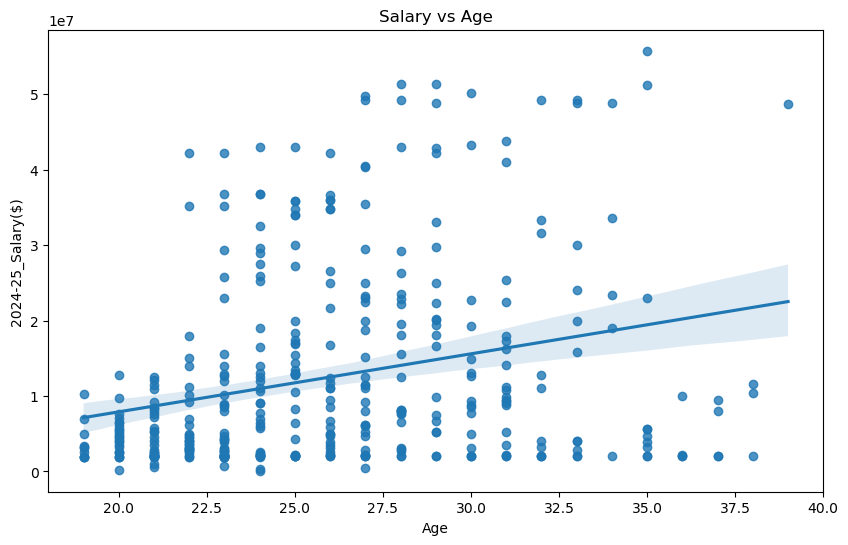

In [2898]:
#Try to use regplot to see the trend
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Age", y="2024-25_Salary($)")
plt.title("Salary vs Age")

#### althought it is not really clear but the line shows that as the age increase the salary tend to be increase 
#### -> since the regplot can only draw a line so it cannot say that when players older the salary reduce

### Tm vs Salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'GSW'),
  Text(1, 0, 'PHI'),
  Text(2, 0, 'DEN'),
  Text(3, 0, 'PHO'),
  Text(4, 0, 'BOS'),
  Text(5, 0, 'NYK'),
  Text(6, 0, 'LAC'),
  Text(7, 0, 'MIA'),
  Text(8, 0, 'MIL'),
  Text(9, 0, 'LAL'),
  Text(10, 0, 'MIN'),
  Text(11, 0, 'DAL'),
  Text(12, 0, 'CHI'),
  Text(13, 0, 'ATL'),
  Text(14, 0, 'HOU'),
  Text(15, 0, 'IND'),
  Text(16, 0, 'UTA'),
  Text(17, 0, 'SAC'),
  Text(18, 0, 'BRK'),
  Text(19, 0, 'NOP'),
  Text(20, 0, 'MEM'),
  Text(21, 0, 'CLE'),
  Text(22, 0, 'OKC'),
  Text(23, 0, 'CHO'),
  Text(24, 0, 'POR'),
  Text(25, 0, 'TOR'),
  Text(26, 0, 'WAS'),
  Text(27, 0, 'SAS'),
  Text(28, 0, 'DET'),
  Text(29, 0, 'ORL')])

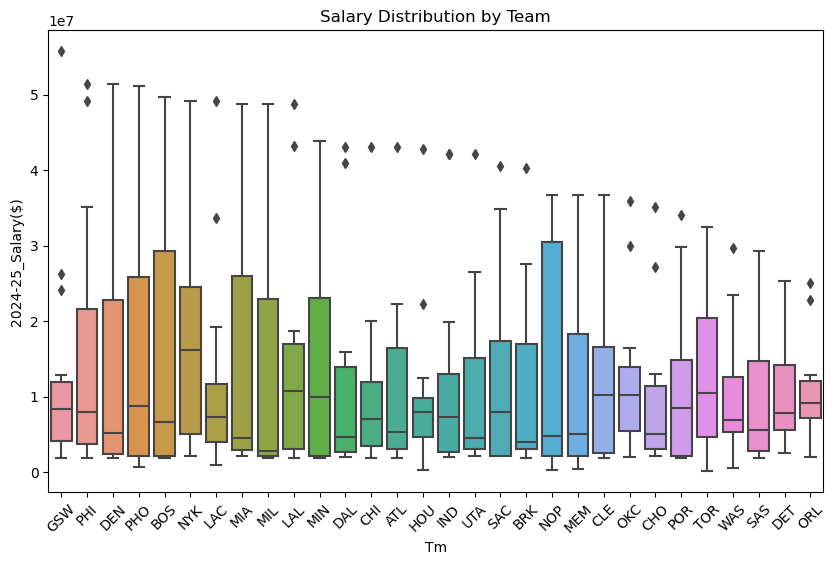

In [2899]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Tm', y='2024-25_Salary($)', data=df)
plt.title("Salary Distribution by Team")
plt.xticks(rotation=45)  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'NYK'),
  Text(1, 0, 'PHO'),
  Text(2, 0, 'PHI'),
  Text(3, 0, 'BOS'),
  Text(4, 0, 'MIA'),
  Text(5, 0, 'MIN'),
  Text(6, 0, 'MIL'),
  Text(7, 0, 'LAL'),
  Text(8, 0, 'NOP'),
  Text(9, 0, 'DEN'),
  Text(10, 0, 'CLE'),
  Text(11, 0, 'TOR'),
  Text(12, 0, 'IND'),
  Text(13, 0, 'GSW'),
  Text(14, 0, 'OKC'),
  Text(15, 0, 'SAC'),
  Text(16, 0, 'LAC'),
  Text(17, 0, 'MEM'),
  Text(18, 0, 'POR'),
  Text(19, 0, 'ATL'),
  Text(20, 0, 'BRK'),
  Text(21, 0, 'DAL'),
  Text(22, 0, 'UTA'),
  Text(23, 0, 'WAS'),
  Text(24, 0, 'CHI'),
  Text(25, 0, 'HOU'),
  Text(26, 0, 'ORL'),
  Text(27, 0, 'DET'),
  Text(28, 0, 'SAS'),
  Text(29, 0, 'CHO')])

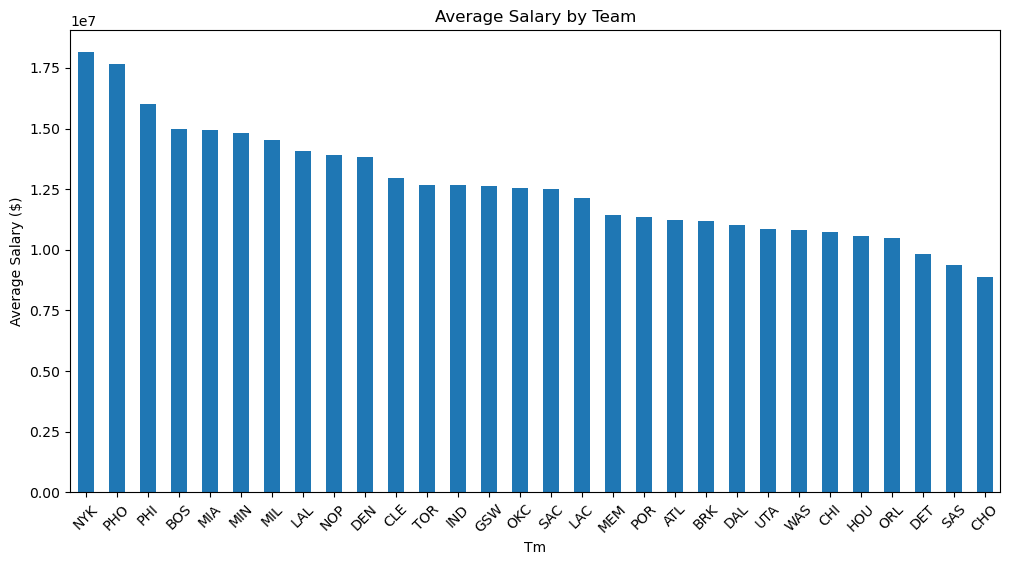

In [2900]:
mean_salary_by_team = df.groupby('Tm')['2024-25_Salary($)'].mean().sort_values(ascending=False)
mean_salary_by_team.plot(kind='bar', figsize=(12, 6), title="Average Salary by Team")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=45)

#### team does effect salary

## DATA ENCODER

#### Since we have 2 catogorical features which are team (Tm) and position (Pos) so we need to encode them
#### Since Tm and Pos don't have really a lot values -> One hot encoder

In [2901]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player_x           395 non-null    object 
 1   Tm                 395 non-null    object 
 2   2024-25_Salary($)  395 non-null    float64
 3   Player-additional  395 non-null    object 
 4   Age                395 non-null    int64  
 5   Pos                395 non-null    object 
 6   G                  395 non-null    int64  
 7   GS                 395 non-null    int64  
 8   MP                 395 non-null    int64  
 9   FG                 395 non-null    int64  
 10  FGA                395 non-null    int64  
 11  FG%                395 non-null    float64
 12  3P                 395 non-null    int64  
 13  3PA                395 non-null    int64  
 14  3P%                395 non-null    float64
 15  2P                 395 non-null    int64  
 16  2PA                395 non

In [2902]:
from sklearn.preprocessing import OneHotEncoder

In [2903]:
cato_values = df[['Pos', 'Tm']].values
cato_values
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to get a DataFrame-friendly array

# Encode 'Pos' and 'Tm' columns
encoded_columns = encoder.fit_transform(df[['Pos', 'Tm']])

# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(
    encoded_columns,
    columns=encoder.get_feature_names_out(['Pos', 'Tm'])
)

# Concatenate the original DataFrame (dropping the original columns) with the encoded DataFrame
df = pd.concat([df.drop(columns=['Pos', 'Tm']), encoded_df], axis=1)
df


/Users/khoatran/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Player_x,2024-25_Salary($),Player-additional,Age,G,GS,MP,FG,FGA,FG%,...,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_UTA,Tm_WAS
0,Stephen Curry,55761216.0,curryst01,35,74,74,2421,650,1445,0.450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Joel Embiid,51415938.0,embiijo01,29,39,39,1309,450,851,0.529,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Nikola Joki\uc0\u263,51415938.0,jokicni01,28,79,79,2737,822,1411,0.583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kevin Durant,51179021.0,duranke01,35,75,75,2791,751,1436,0.523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bradley Beal,50203930.0,bealbr01,30,53,53,1767,377,735,0.513,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Ryan Rollins,600000.0,rolliry01,21,13,0,78,14,27,0.519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
391,Mamadi Diakite,464050.0,diakima01,27,6,0,24,4,6,0.667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,Jaylen Nowell,278782.0,nowelja01,24,13,1,214,34,78,0.436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,AJ Griffin,250000.0,griffaj01,20,20,0,171,18,62,0.290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2904]:
df.columns

Index(['Player_x', '2024-25_Salary($)', 'Player-additional', 'Age', 'G', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards', 'Pos_C', 'Pos_PF', 'Pos_PG',
       'Pos_SF', 'Pos_SG', 'Tm_ATL', 'Tm_BOS', 'Tm_BRK', 'Tm_CHI', 'Tm_CHO',
       'Tm_CLE', 'Tm_DAL', 'Tm_DEN', 'Tm_DET', 'Tm_GSW', 'Tm_HOU', 'Tm_IND',
       'Tm_LAC', 'Tm_LAL', 'Tm_MEM', 'Tm_MIA', 'Tm_MIL', 'Tm_MIN', 'Tm_NOP',
       'Tm_NYK', 'Tm_OKC', 'Tm_ORL', 'Tm_PHI', 'Tm_PHO', 'Tm_POR', 'Tm_SAC',
       'Tm_SAS', 'Tm_TOR', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

## FEATURE SELECTION

#### first try to drop some of most unrelated features by my knowledge

In [2905]:

df.columns

Index(['Player_x', '2024-25_Salary($)', 'Player-additional', 'Age', 'G', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards', 'Pos_C', 'Pos_PF', 'Pos_PG',
       'Pos_SF', 'Pos_SG', 'Tm_ATL', 'Tm_BOS', 'Tm_BRK', 'Tm_CHI', 'Tm_CHO',
       'Tm_CLE', 'Tm_DAL', 'Tm_DEN', 'Tm_DET', 'Tm_GSW', 'Tm_HOU', 'Tm_IND',
       'Tm_LAC', 'Tm_LAL', 'Tm_MEM', 'Tm_MIA', 'Tm_MIL', 'Tm_MIN', 'Tm_NOP',
       'Tm_NYK', 'Tm_OKC', 'Tm_ORL', 'Tm_PHI', 'Tm_PHO', 'Tm_POR', 'Tm_SAC',
       'Tm_SAS', 'Tm_TOR', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

#### 1. drop target value first
#### 2. Player_x, Player-additional: players' name nearly do not affect the salary and also Team
#### 3. ORB and DRB can be drop, we can use TRB

In [2906]:
X = df.drop(columns=['2024-25_Salary($)', 'Player_x', 'Player-additional', 'ORB', 'DRB'])
Y = df['2024-25_Salary($)']
target = df['2024-25_Salary($)']


#### Now I will use the Correlation Analysis

In [2907]:
X

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_UTA,Tm_WAS
0,35,74,74,2421,650,1445,0.450,357,876,0.408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,39,39,1309,450,851,0.529,54,139,0.388,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,79,79,2737,822,1411,0.583,83,231,0.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,75,75,2791,751,1436,0.523,168,407,0.413,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,53,53,1767,377,735,0.513,101,235,0.430,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,21,13,0,78,14,27,0.519,3,4,0.750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
391,27,6,0,24,4,6,0.667,0,1,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,24,13,1,214,34,78,0.436,6,29,0.207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,20,20,0,171,18,62,0.290,10,39,0.256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2908]:
X.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards', 'Pos_C', 'Pos_PF', 'Pos_PG',
       'Pos_SF', 'Pos_SG', 'Tm_ATL', 'Tm_BOS', 'Tm_BRK', 'Tm_CHI', 'Tm_CHO',
       'Tm_CLE', 'Tm_DAL', 'Tm_DEN', 'Tm_DET', 'Tm_GSW', 'Tm_HOU', 'Tm_IND',
       'Tm_LAC', 'Tm_LAL', 'Tm_MEM', 'Tm_MIA', 'Tm_MIL', 'Tm_MIN', 'Tm_NOP',
       'Tm_NYK', 'Tm_OKC', 'Tm_ORL', 'Tm_PHI', 'Tm_PHO', 'Tm_POR', 'Tm_SAC',
       'Tm_SAS', 'Tm_TOR', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

In [2909]:
general = df[['Age', 'G', 'GS', 'MP']]
cor = general.corr()
cor

,Age,G,GS,MP
Age,1.000000,0.161170,0.116572,0.181568
G,0.161170,1.000000,0.559814,0.831247
GS,0.116572,0.559814,1.000000,0.855920
MP,0.181568,0.831247,0.855920,1.000000


<Axes: >

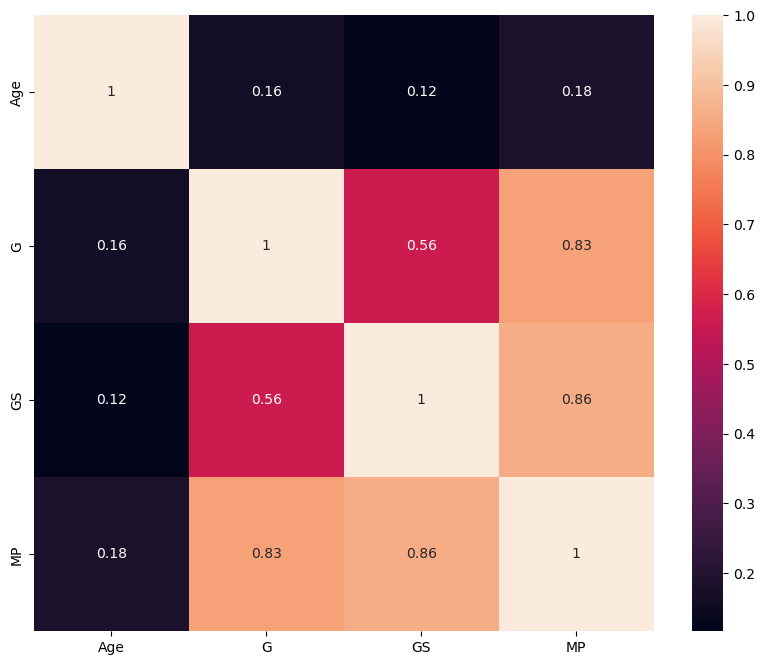

In [2910]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True)


#### we can see that GS and MP have a strong correlation (0.86/ 1), it is easy to explain since Game Started and Minute Played is also lead to the total time play of a player, the same thing happen between MP and G
#### I will keep 1 of them, usually player in start line up usually is an important one, also in some match between a strong team with weak team, the time played is not reflect the important of players since coach will let important take a rest
#### I decide to keep GS and drop G and MP

In [2911]:
X = X.drop(columns=['G', 'MP'])

### Im considering about some columns like 'FG', 'FGA', 'FG%', FG% is the result of FG and FGA, so let see their correlation

In [2912]:
fg_df = X[['FG', 'FGA', 'FG%']]
fg_df

,FG,FGA,FG%
0,650,1445,0.450
1,450,851,0.529
2,822,1411,0.583
3,751,1436,0.523
4,377,735,0.513
...,...,...,...
390,14,27,0.519
391,4,6,0.667
392,34,78,0.436
393,18,62,0.290


<Axes: >

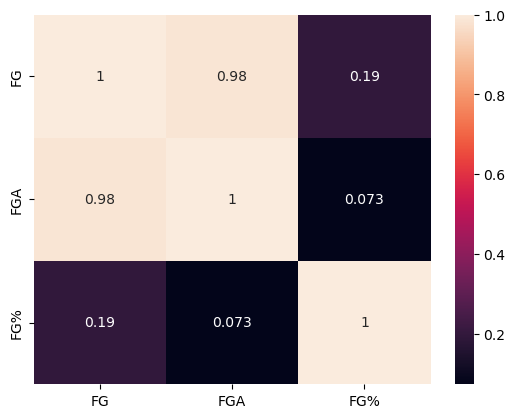

In [2913]:
fd_cor = fg_df.corr()
sns.heatmap(fd_cor, annot=True)

#### we will keep FG% and one of FGA or FG (since FG% is show week corelation with other), between FGA and FG, I rather FG, since the important player usually score more -> their salary can be higher
#### it will be the same with 3P and 2P

In [2914]:
#let see the correlation between FG and FG% with salary
#FG 

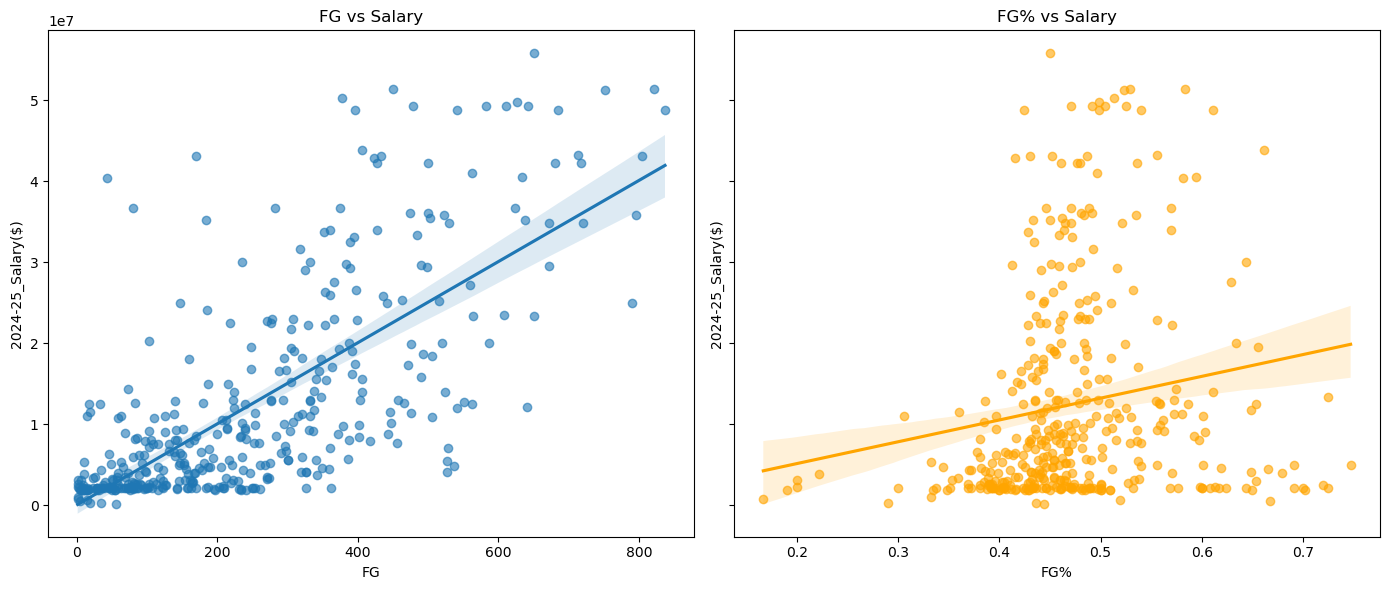

In [2915]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Regression plot for FG vs Salary
sns.regplot(data=df, x='FG', y='2024-25_Salary($)', scatter_kws={'alpha': 0.6}, ax=axes[0])
axes[0].set_title('FG vs Salary')

# Regression plot for FG% vs Salary
sns.regplot(data=df, x='FG%', y='2024-25_Salary($)', scatter_kws={'alpha': 0.6}, color='orange', ax=axes[1])
axes[1].set_title('FG% vs Salary')

plt.tight_layout()

### while FG show really clear the relationship with salary, FG% does not, players has 0.45-0.65 is most and the highest salary here but it cannot say anything because 0.45-0.65 low salary is a lot
## -> drop FG%

In [2916]:
X = X.drop(columns=['FGA', 'FG%'])

In [2917]:
#The similar thing with 2P and 3P
X = X.drop(columns=['3P%', '3PA', '2PA', '2P%'])
X

,Age,GS,FG,3P,2P,eFG%,FT,FTA,FT%,TRB,...,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_UTA,Tm_WAS
0,35,74,650,357,293,0.573,299,324,0.923,330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,39,450,54,396,0.561,399,452,0.883,430,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,79,822,83,739,0.612,358,438,0.817,976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,75,751,168,583,0.581,362,423,0.856,495,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,53,377,101,276,0.582,109,134,0.813,232,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,21,0,14,3,11,0.574,13,17,0.765,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
391,27,0,4,0,4,0.667,4,6,0.667,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,24,1,34,6,28,0.474,7,9,0.778,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,20,0,18,10,8,0.371,2,2,1.000,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2918]:
X

,Age,GS,FG,3P,2P,eFG%,FT,FTA,FT%,TRB,...,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_UTA,Tm_WAS
0,35,74,650,357,293,0.573,299,324,0.923,330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,39,450,54,396,0.561,399,452,0.883,430,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,79,822,83,739,0.612,358,438,0.817,976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,75,751,168,583,0.581,362,423,0.856,495,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,53,377,101,276,0.582,109,134,0.813,232,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,21,0,14,3,11,0.574,13,17,0.765,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
391,27,0,4,0,4,0.667,4,6,0.667,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,24,1,34,6,28,0.474,7,9,0.778,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,20,0,18,10,8,0.371,2,2,1.000,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


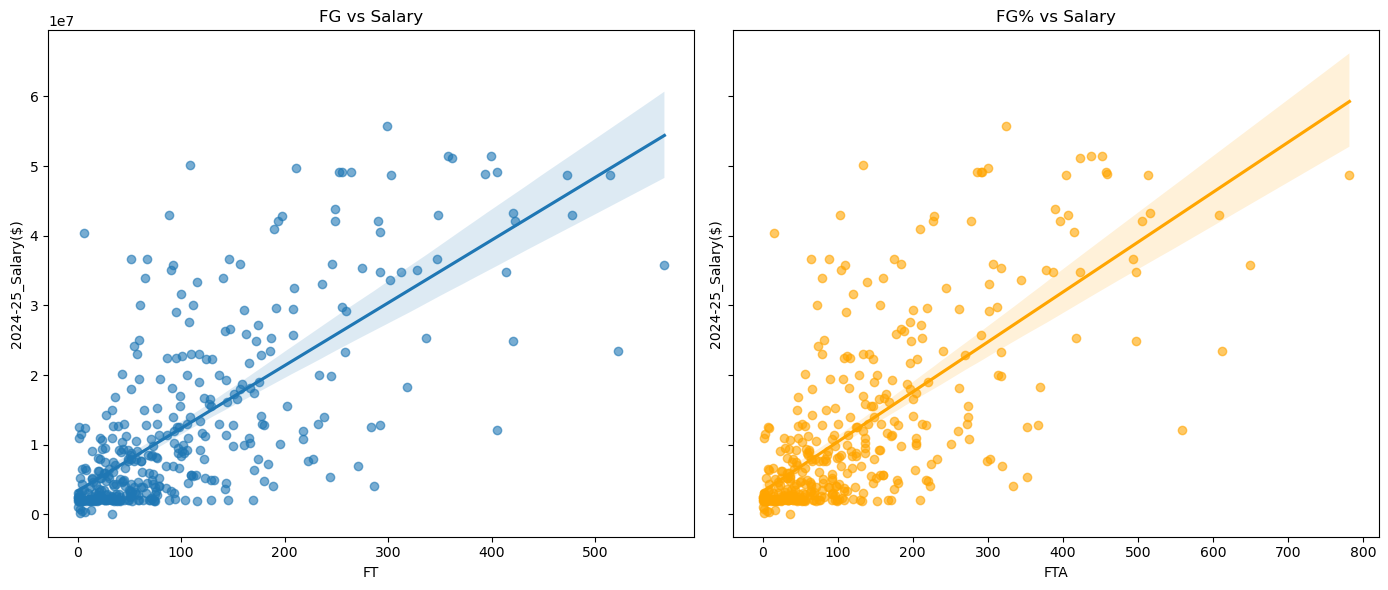

In [2919]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Regression plot for FG vs Salary
sns.regplot(data=df, x='FT', y='2024-25_Salary($)', scatter_kws={'alpha': 0.6}, ax=axes[0])
axes[0].set_title('FG vs Salary')

# Regression plot for FG% vs Salary
sns.regplot(data=df, x='FTA', y='2024-25_Salary($)', scatter_kws={'alpha': 0.6}, color='orange', ax=axes[1])
axes[1].set_title('FG% vs Salary')

plt.tight_layout()

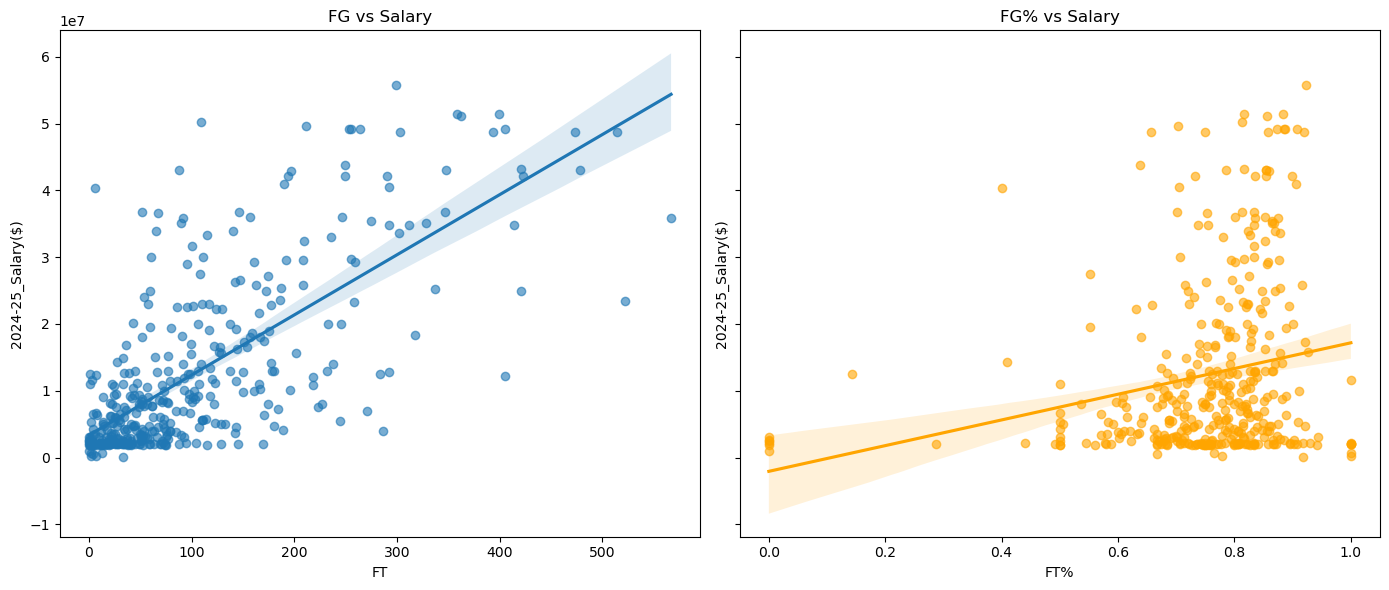

In [2920]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Regression plot for FG vs Salary
sns.regplot(data=df, x='FT', y='2024-25_Salary($)', scatter_kws={'alpha': 0.6}, ax=axes[0])
axes[0].set_title('FG vs Salary')

# Regression plot for FG% vs Salary
sns.regplot(data=df, x='FT%', y='2024-25_Salary($)', scatter_kws={'alpha': 0.6}, color='orange', ax=axes[1])
axes[1].set_title('FG% vs Salary')

plt.tight_layout()

### Most of NBA players have the percentage of sucess free throw up to more than 0.6 -> FT% cant say anything
### we drop FT% and one of FG or FGA, since important player usually notice by oponent defender -> their FTA will be higher -> FT will be higher. I will pick FTA in this case

In [2921]:
X = X.drop(columns=['FT', 'FT%'])

In [2922]:
X

,Age,GS,FG,3P,2P,eFG%,FTA,TRB,AST,STL,...,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_UTA,Tm_WAS
0,35,74,650,357,293,0.573,324,330,379,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,39,450,54,396,0.561,452,430,219,46,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,79,822,83,739,0.612,438,976,708,108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,75,751,168,583,0.581,423,495,378,69,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,53,377,101,276,0.582,134,232,265,52,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,21,0,14,3,11,0.574,17,13,14,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
391,27,0,4,0,4,0.667,6,4,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,24,1,34,6,28,0.474,9,24,19,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,20,0,18,10,8,0.371,2,18,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2923]:
X.columns

Index(['Age', 'GS', 'FG', '3P', '2P', 'eFG%', 'FTA', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards', 'Pos_C', 'Pos_PF',
       'Pos_PG', 'Pos_SF', 'Pos_SG', 'Tm_ATL', 'Tm_BOS', 'Tm_BRK', 'Tm_CHI',
       'Tm_CHO', 'Tm_CLE', 'Tm_DAL', 'Tm_DEN', 'Tm_DET', 'Tm_GSW', 'Tm_HOU',
       'Tm_IND', 'Tm_LAC', 'Tm_LAL', 'Tm_MEM', 'Tm_MIA', 'Tm_MIL', 'Tm_MIN',
       'Tm_NOP', 'Tm_NYK', 'Tm_OKC', 'Tm_ORL', 'Tm_PHI', 'Tm_PHO', 'Tm_POR',
       'Tm_SAC', 'Tm_SAS', 'Tm_TOR', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

In [2924]:
score_df = X[['FG', '3P', '2P', 'eFG%', 'FTA', 'PTS']]
score_cor = score_df.corr()


<Axes: >

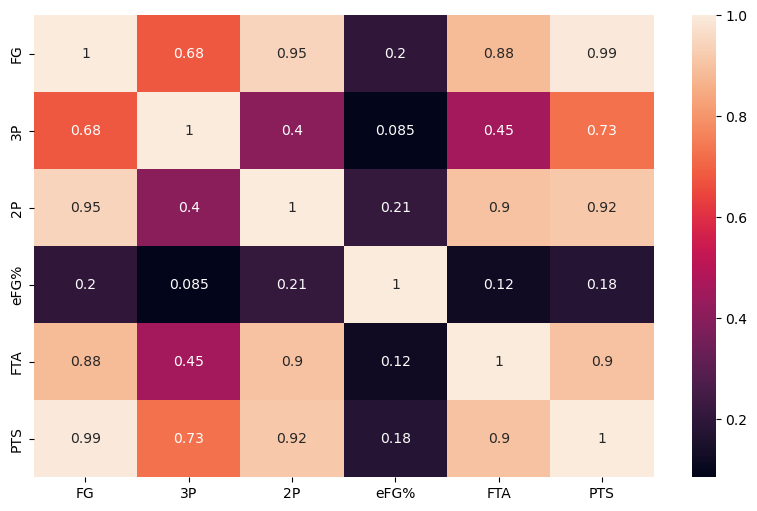

In [2925]:
plt.figure(figsize=(10, 6))
sns.heatmap(score_cor, annot=True)

#### High Correlation Features:
##### FG, 2P, and PTS:
These are highly correlated (e.g., FG and PTS = 0.99, FG and 2P = 0.95, PTS and 2P = 0.92).
might keep only PTS as the target variable or main scoring-related feature since it's the most comprehensive scoring metric.
Drop FG and 2P, as they offer limited additional information.
##### FTA and PTS:
There is a high correlation (0.9) between free throw attempts and total points. I consider drop FTA.
##### 3P and PTS:
The correlation (0.73) is moderate, so keeping 3P makes sense if analyzing 3-point contributions is a focus. 


In [2926]:
# in modern NBA, 3P throw has a really vital role in a match therefore i will keep 3P but drop 2P (corr with PTS)
X = X.drop(columns=['2P', 'FG', 'FTA'])

In [2927]:
X.columns

Index(['Age', 'GS', '3P', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Trp-Dbl', 'Awards', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'Pos_SG', 'Tm_ATL', 'Tm_BOS', 'Tm_BRK', 'Tm_CHI', 'Tm_CHO', 'Tm_CLE',
       'Tm_DAL', 'Tm_DEN', 'Tm_DET', 'Tm_GSW', 'Tm_HOU', 'Tm_IND', 'Tm_LAC',
       'Tm_LAL', 'Tm_MEM', 'Tm_MIA', 'Tm_MIL', 'Tm_MIN', 'Tm_NOP', 'Tm_NYK',
       'Tm_OKC', 'Tm_ORL', 'Tm_PHI', 'Tm_PHO', 'Tm_POR', 'Tm_SAC', 'Tm_SAS',
       'Tm_TOR', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

In [2928]:
other_stat = X[['TRB', 'AST', 'STL', 'BLK', 'TOV']]

In [2929]:
other_corr = other_stat.corr()


<Axes: >

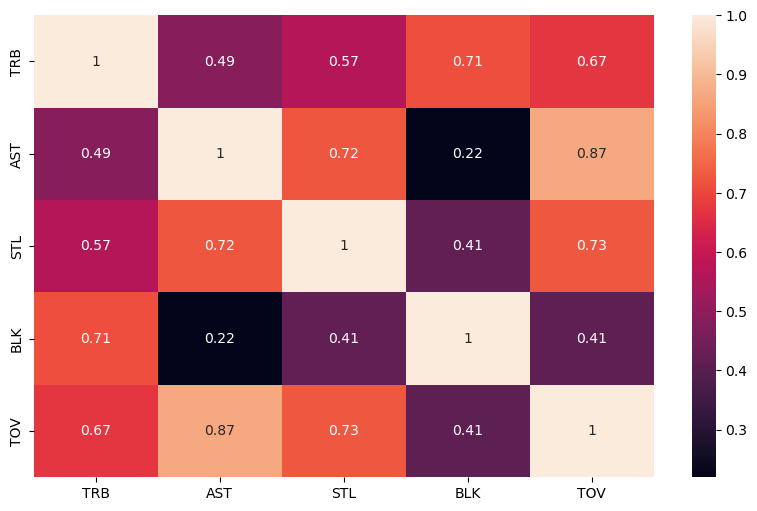

In [2930]:
plt.figure(figsize=(10, 6))
sns.heatmap(other_corr, annot=True)

<Axes: xlabel='AST', ylabel='TOV'>

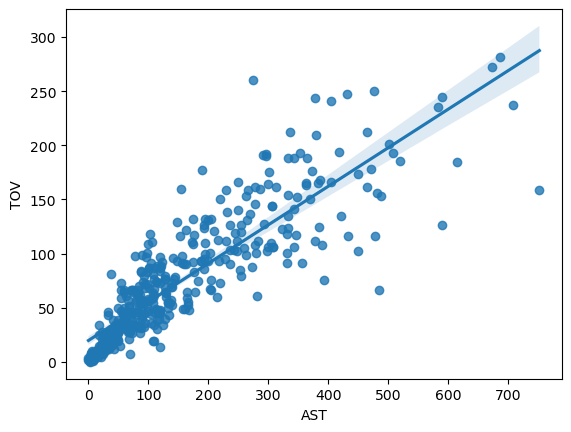

In [2931]:
# let see the relate of AST and TOV
sns.regplot(data=X, x='AST', y='TOV')

### TOV vs AST
In NBA, PG tends to keep the ball and playermaking player, they posses the ball when start a atack, most of turnover from the start of an atack, and PG also the one who creative and pass the good ball for teammate

#### block and rebound also related because it usually done by a tall player
### Now the question is what should be drop

### Keep AST as it directly represents playmaking ability. Drop TOV (i think it is hard to say nothing about a player's ability).

### I am considering about STL so lets check

<Axes: xlabel='STL', ylabel='2024-25_Salary($)'>

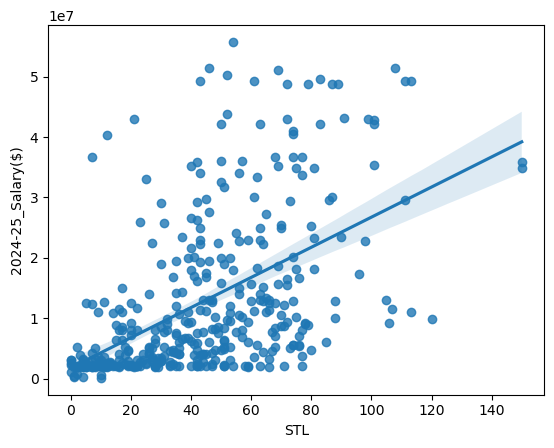

In [2932]:
# let see the relate of STL and salary
sns.regplot(data=df, x='STL', y='2024-25_Salary($)')

### clearly that it says nearly nothing

In [2933]:
#drop TOV and STL
X = X.drop(columns=['TOV', 'STL'])


In [2934]:
X.columns

Index(['Age', 'GS', '3P', 'eFG%', 'TRB', 'AST', 'BLK', 'PF', 'PTS', 'Trp-Dbl',
       'Awards', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG', 'Tm_ATL',
       'Tm_BOS', 'Tm_BRK', 'Tm_CHI', 'Tm_CHO', 'Tm_CLE', 'Tm_DAL', 'Tm_DEN',
       'Tm_DET', 'Tm_GSW', 'Tm_HOU', 'Tm_IND', 'Tm_LAC', 'Tm_LAL', 'Tm_MEM',
       'Tm_MIA', 'Tm_MIL', 'Tm_MIN', 'Tm_NOP', 'Tm_NYK', 'Tm_OKC', 'Tm_ORL',
       'Tm_PHI', 'Tm_PHO', 'Tm_POR', 'Tm_SAC', 'Tm_SAS', 'Tm_TOR', 'Tm_UTA',
       'Tm_WAS'],
      dtype='object')

### PF vs Salary

<Axes: xlabel='PF', ylabel='2024-25_Salary($)'>

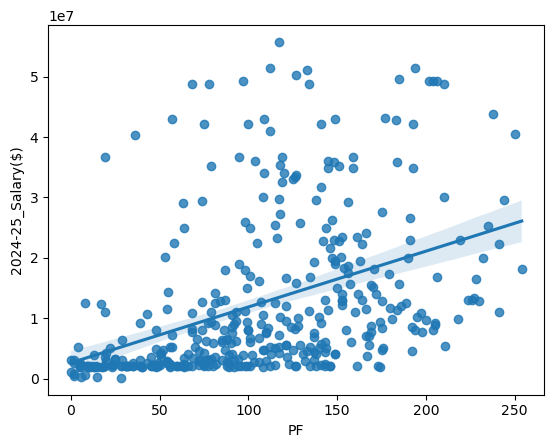

In [2935]:
sns.regplot(data=df, x='PF', y='2024-25_Salary($)')

In [2936]:
X = X.drop(columns='PF')

### Trp-Dbl vs Salary

<Axes: xlabel='Trp-Dbl', ylabel='2024-25_Salary($)'>

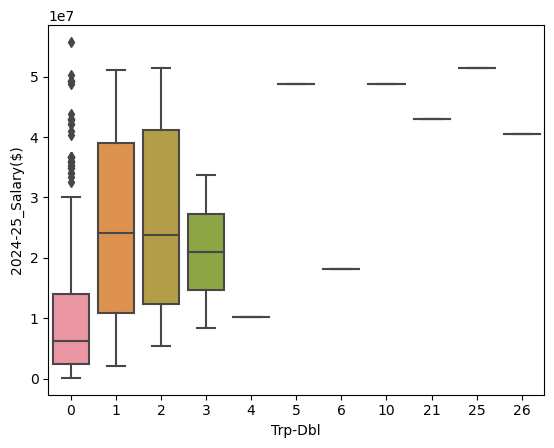

In [2937]:
sns.boxplot(data=df, x='Trp-Dbl', y='2024-25_Salary($)')

Tripble double is based on player's point, rebound and assist, therefore i would drop this feature

### Awards vs Salary

<Axes: xlabel='Awards', ylabel='2024-25_Salary($)'>

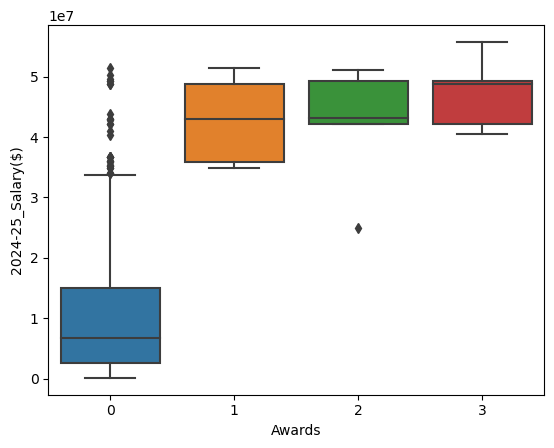

In [2938]:
sns.boxplot(data=df, x='Awards', y='2024-25_Salary($)')

### keep award feature

In [2939]:
X = X.drop(columns='Trp-Dbl')

In [2940]:
X.columns

Index(['Age', 'GS', '3P', 'eFG%', 'TRB', 'AST', 'BLK', 'PTS', 'Awards',
       'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG', 'Tm_ATL', 'Tm_BOS',
       'Tm_BRK', 'Tm_CHI', 'Tm_CHO', 'Tm_CLE', 'Tm_DAL', 'Tm_DEN', 'Tm_DET',
       'Tm_GSW', 'Tm_HOU', 'Tm_IND', 'Tm_LAC', 'Tm_LAL', 'Tm_MEM', 'Tm_MIA',
       'Tm_MIL', 'Tm_MIN', 'Tm_NOP', 'Tm_NYK', 'Tm_OKC', 'Tm_ORL', 'Tm_PHI',
       'Tm_PHO', 'Tm_POR', 'Tm_SAC', 'Tm_SAS', 'Tm_TOR', 'Tm_UTA', 'Tm_WAS'],
      dtype='object')

In [2941]:
final_stat = X[['3P', 'eFG%', 'TRB', 'AST', 'BLK', 'PTS']]

In [2942]:
stat_corr = final_stat.corr()

<Axes: >

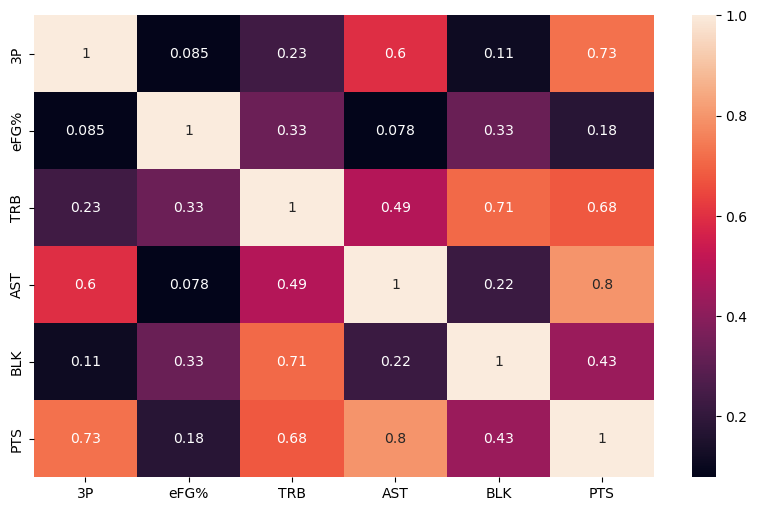

In [2943]:
plt.figure(figsize=(10, 6))
sns.heatmap(stat_corr, annot=True)

In [2944]:
# it is look fine overall

### MODEL TRAINING

### Spling test and train

In [2945]:
from sklearn.model_selection import train_test_split


In [2946]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,random_state=42, shuffle=True)

In [2947]:
X_train

,Age,GS,3P,eFG%,TRB,AST,BLK,PTS,Awards,Pos_C,...,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_UTA,Tm_WAS
181,21,80,82,0.523,514,386,44,986,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,28,43,134,0.582,246,101,23,692,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,23,0,6,0.483,126,32,38,186,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,24,66,117,0.494,365,154,106,1486,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,22,51,144,0.503,214,192,16,1482,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23,71,86,0.557,224,101,42,757,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,23,75,88,0.560,540,286,36,1102,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
270,32,0,13,0.461,30,42,3,63,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,26,4,4,0.591,141,23,16,217,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression

In [2948]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [2949]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_val)

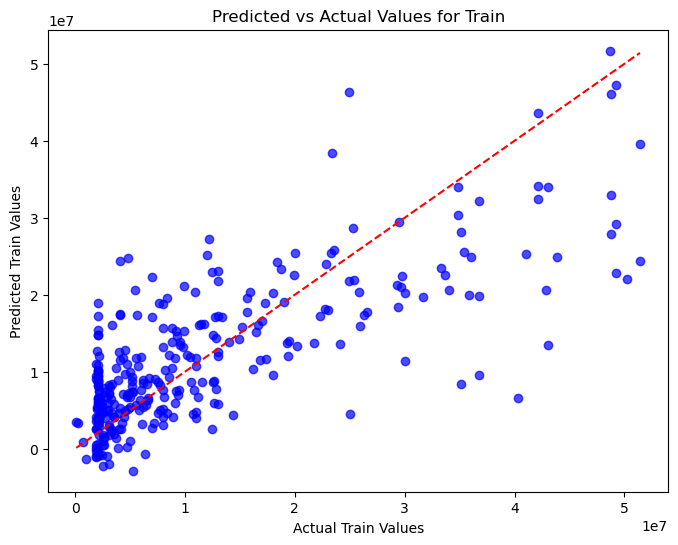

In [2950]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, y_pred_train, alpha=0.7, color="blue")
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], '--r')  # 45-degree line
plt.xlabel("Actual Train Values")
plt.ylabel("Predicted Train Values")
plt.title("Predicted vs Actual Values for Train")
plt.show()


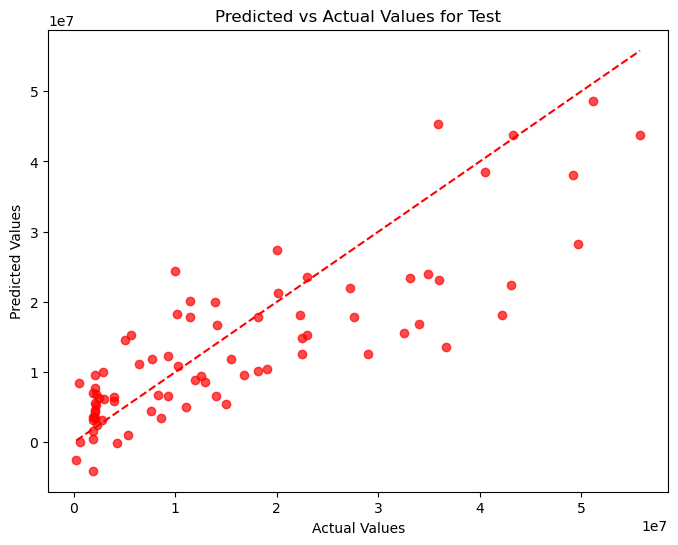

In [2951]:
# for test
plt.figure(figsize=(8, 6))
plt.scatter(Y_val, y_pred_test, alpha=0.7, color="red")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], '--r')  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values for Test")
plt.show()


the predictions exhibit notable deviations from the actual values, particularly for higher salaries. 

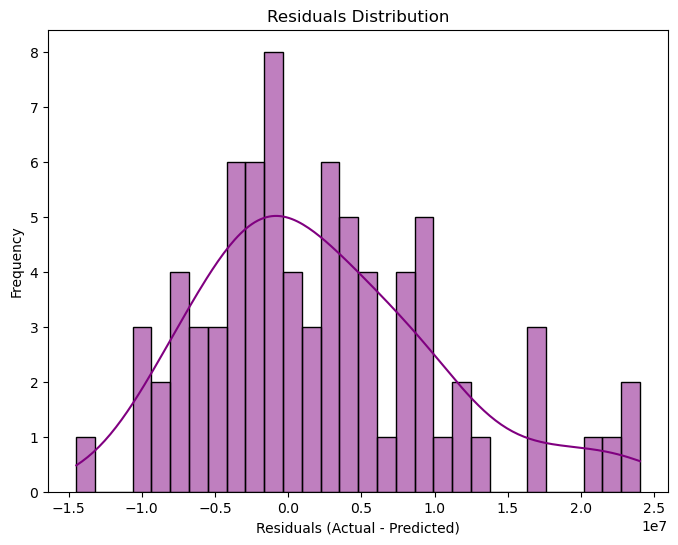

In [2952]:
residuals = Y_val - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

### RANDOM FORREST

In [2953]:
from sklearn.ensemble import RandomForestRegressor

In [2954]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [2955]:
# Predict on the training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_val)


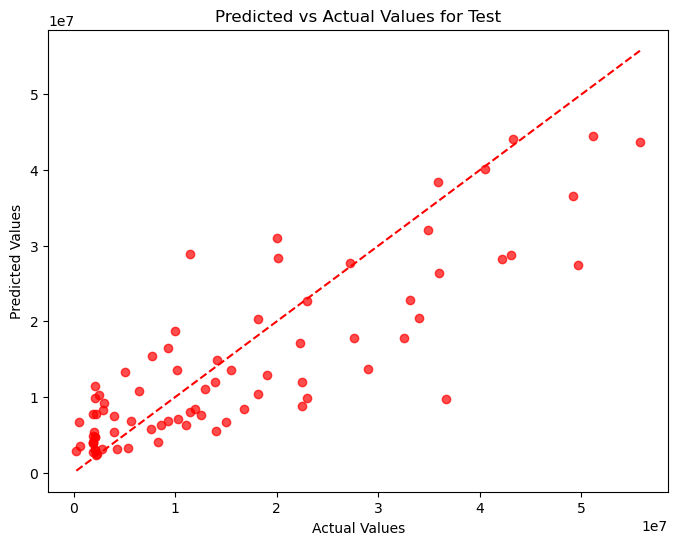

In [2956]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_val, y_test_pred, alpha=0.7, color="red")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], '--r')  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values for Test")
plt.show()

quite the same as linear regression

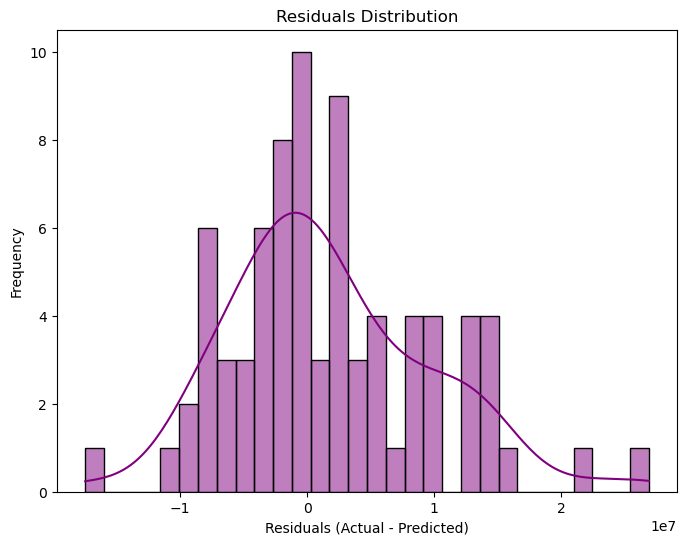

In [2957]:
residuals = Y_val - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

### COMPARE TWO ALGORITHM

In [2958]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression performance
linear_train_r2 = r2_score(Y_train, y_pred_train)
linear_train_mse = mean_squared_error(Y_train, y_pred_train)
linear_test_r2 = r2_score(Y_val, y_pred_test)
linear_test_mse = mean_squared_error(Y_val, y_pred_test)

# Random Forest performance
rf_train_r2 = r2_score(Y_train, y_train_pred)
rf_train_mse = mean_squared_error(Y_train, y_train_pred)
rf_test_r2 = r2_score(Y_val, rf_model.predict(X_val))
rf_test_mse = mean_squared_error(Y_val, rf_model.predict(X_val))

# Print the results
print("Linear Regression:")
print(f"Training R²: {linear_train_r2:.3f}, Training MSE: {linear_train_mse:.2f}")
print(f"Testing R²: {linear_test_r2:.3f}, Testing MSE: {linear_test_mse:.2f}\n")

print("Random Forest Regressor:")
print(f"Training R²: {rf_train_r2:.3f}, Training MSE: {rf_train_mse:.2f}")
print(f"Testing R²: {rf_test_r2:.3f}, Testing MSE: {rf_test_mse:.2f}")


Linear Regression:
Training R²: 0.576, Training MSE: 65365367113758.63
Testing R²: 0.672, Testing MSE: 70419601728358.56

Random Forest Regressor:
Training R²: 0.924, Training MSE: 11780220378244.46
Testing R²: 0.699, Testing MSE: 64522425789872.29


## TRY TO IMPROVE BY DROPING LESS IMPORTANT FEATURES

In [2959]:
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

   Feature  Importance
7      PTS    0.452813
1       GS    0.147300
0      Age    0.105831
5      AST    0.052857
4      TRB    0.044880
6      BLK    0.038418
3     eFG%    0.038097
2       3P    0.023851
8   Awards    0.013311
17  Tm_CHI    0.013207
11  Pos_PG    0.006578
12  Pos_SF    0.005980
16  Tm_BRK    0.005903
37  Tm_PHO    0.004081
28  Tm_MEM    0.003986
36  Tm_PHI    0.003310
33  Tm_NYK    0.003238
30  Tm_MIL    0.003123
10  Pos_PF    0.002890
35  Tm_ORL    0.002636
27  Tm_LAL    0.002613
18  Tm_CHO    0.002608
31  Tm_MIN    0.002158
13  Pos_SG    0.001994
23  Tm_GSW    0.001852
34  Tm_OKC    0.001833
38  Tm_POR    0.001293
32  Tm_NOP    0.001265
9    Pos_C    0.001169
43  Tm_WAS    0.001167
29  Tm_MIA    0.001114
19  Tm_CLE    0.001112
15  Tm_BOS    0.001086
39  Tm_SAC    0.000945
41  Tm_TOR    0.000841
21  Tm_DEN    0.000791
40  Tm_SAS    0.000786
14  Tm_ATL    0.000606
22  Tm_DET    0.000493
42  Tm_UTA    0.000476
24  Tm_HOU    0.000425
26  Tm_LAC    0.000388
25  Tm_IND 

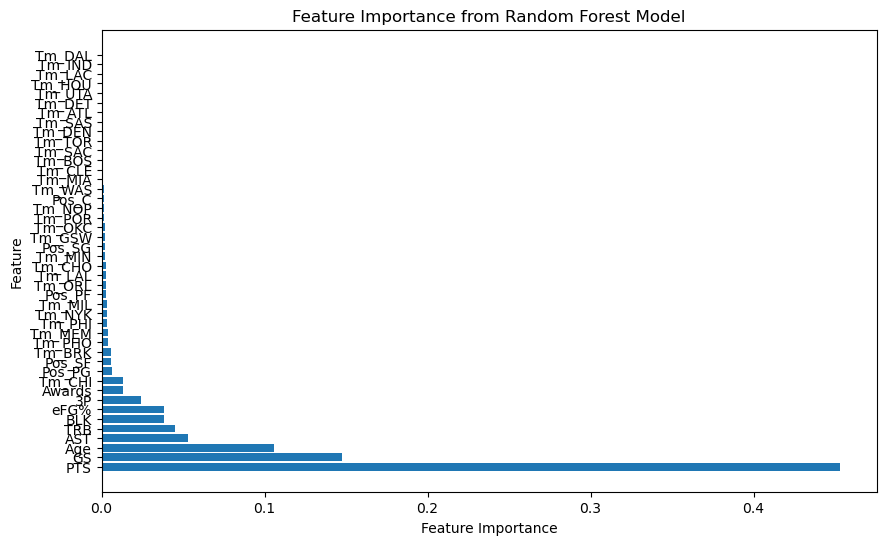

In [2960]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()


In [2961]:
# Drop features with importance less than 0.01
threshold = 0.01
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature']
X_train_dropped = X_train.drop(columns=features_to_drop)
X_val_dropped = X_val.drop(columns=features_to_drop)

print("Dropped Features:", features_to_drop)


Dropped Features: 11    Pos_PG
12    Pos_SF
16    Tm_BRK
37    Tm_PHO
28    Tm_MEM
36    Tm_PHI
33    Tm_NYK
30    Tm_MIL
10    Pos_PF
35    Tm_ORL
27    Tm_LAL
18    Tm_CHO
31    Tm_MIN
13    Pos_SG
23    Tm_GSW
34    Tm_OKC
38    Tm_POR
32    Tm_NOP
9      Pos_C
43    Tm_WAS
29    Tm_MIA
19    Tm_CLE
15    Tm_BOS
39    Tm_SAC
41    Tm_TOR
21    Tm_DEN
40    Tm_SAS
14    Tm_ATL
22    Tm_DET
42    Tm_UTA
24    Tm_HOU
26    Tm_LAC
25    Tm_IND
20    Tm_DAL
Name: Feature, dtype: object


In [2962]:
# Train a RandomForest model with the reduced features
rf_model_dropped = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_dropped.fit(X_train_dropped, Y_train)

y_train_pred_dropped = rf_model_dropped.predict(X_train_dropped)
y_val_pred_dropped = rf_model_dropped.predict(X_val_dropped)

from sklearn.metrics import mean_squared_error, r2_score

train_r2_dropped = r2_score(Y_train, y_train_pred_dropped)
val_r2_dropped = r2_score(Y_val, y_val_pred_dropped)
train_mse_dropped = mean_squared_error(Y_train, y_train_pred_dropped)
val_mse_dropped = mean_squared_error(Y_val, y_val_pred_dropped)

print(f"Training R² (after dropping): {train_r2_dropped}")
print(f"Testing R² (after dropping): {val_r2_dropped}")
print(f"Training MSE (after dropping): {train_mse_dropped}")
print(f"Testing MSE (after dropping): {val_mse_dropped}")


Training R² (after dropping): 0.9254722529093327
Testing R² (after dropping): 0.6958862638171802
Training MSE (after dropping): 11490180861158.945
Testing MSE (after dropping): 65221897488299.51


### Visualization of Actual vs Predicted (after feature selection)

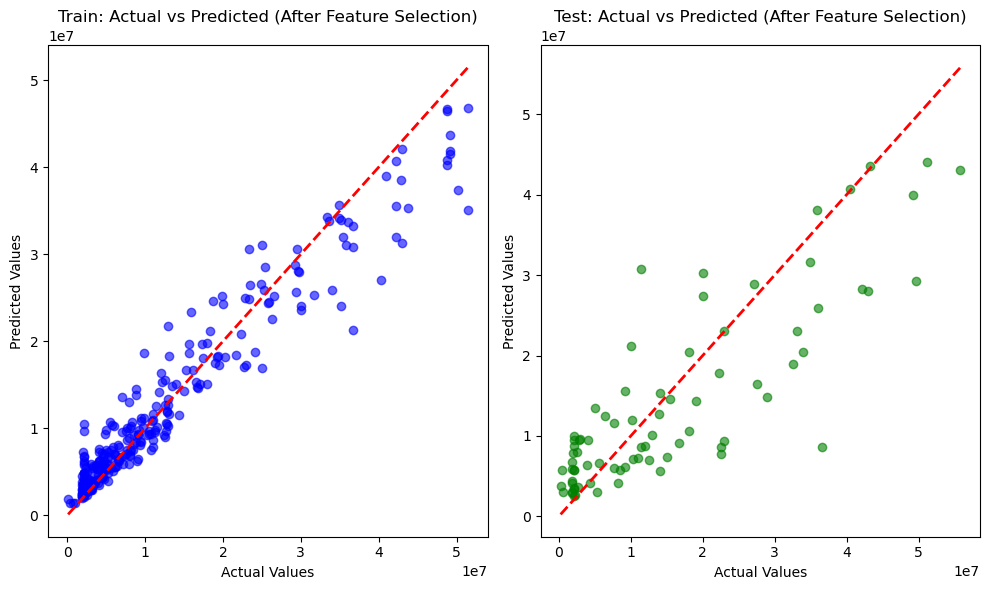

In [2963]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_dropped, color='blue', alpha=0.6)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train: Actual vs Predicted (After Feature Selection)')

plt.subplot(1, 2, 2)
plt.scatter(Y_val, y_val_pred_dropped, color='green', alpha=0.6)
plt.plot([min(Y_val), max(Y_val)], [min(Y_val), max(Y_val)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test: Actual vs Predicted (After Feature Selection)')

plt.tight_layout()
plt.show()


## Conclusion:
### Random Forest is performing better overall than Linear Regression, both in terms of R² and MSE.
### The improvement seen after dropping features suggests that feature selection is beneficial and helps reduce complexity and overfitting.

## I will create a Python version with after drop random forest